-0.00000245903174584050946427653434878113358763584983535110950469970703125


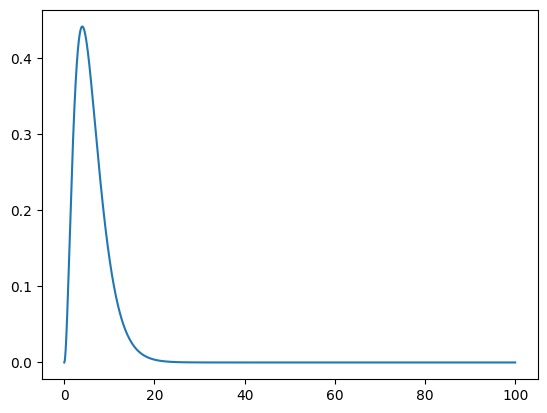

In [121]:
import math as m
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from decimal import Decimal
%matplotlib inline

def F(u,x,E,l) :
    out = -2*u*( 1/x + E - l*(l+1)/x**2/2 )
    return out 

def Verlet(E,l) : 
# Verlet algorithm to solve the radial Schrodinger's equation
    r_max = 100
    h = 0.0001
    N = int(r_max/h) + 1
    r = np.linspace(0,r_max,N)
    u = np.zeros((1,N))
    f = np.zeros((1,N))
    # define u(r_max) and u(r_max - h) by asymptotic wavefunction 
    u[0,N-1] = 0
    u[0,N-2] = np.exp(-r_max + h)
    f[0,N-1] = 0
    f[0,N-2] = 0
    for ele in range(3,N + 1) :
        u[0,-ele] = 2*u[0,-(ele-1)] - u[0,-(ele-2)] + F(u[0,-(ele-1)], r[-(ele-1)], E,l)*h**2
        f[0,-ele] = F(u[0,-(ele-1)], r[-(ele-1)], E,l)*h**2
    I = 0
    for ele in u[0,:] :
        I = I + (ele**2)*h
    u[0,:] = u[0,:]/np.sqrt(I)
    f[0,:] = f[0,:]/np.sqrt(I)
    return r,u[0,:],f[0,:]

r, u, f = Verlet(-0.5/2**2,1)

plt.plot(r,u)
print(Decimal(u[0]))


array([-1.42146880e-06, -1.91985605e-07, -5.53780841e-08, -2.12268043e-08,
       -8.93276474e-09, -3.46909567e-09, -6.81812155e-10,  8.85765882e-10,
        1.83381156e-09,  2.44034029e-09,  2.84616131e-09,  3.12779452e-09,
        3.32926350e-09,  3.47711930e-09,  3.58802326e-09,  3.67279083e-09,
        3.73865100e-09,  3.79056040e-09,  3.83199482e-09,  3.86544062e-09,
        3.89270834e-09,  3.91513764e-09,  3.93373420e-09,  3.94926295e-09,
        3.96231270e-09,  3.97334171e-09,  3.98271023e-09,  3.99070412e-09,
        3.99755215e-09,  4.00343891e-09,  4.00851440e-09,  4.01290142e-09,
        4.01670110e-09,  4.01999727e-09,  4.02285980e-09,  4.02534725e-09,
        4.02750892e-09,  4.02938657e-09,  4.03101567e-09,  4.03242651e-09,
        4.03364507e-09,  4.03469370e-09,  4.03559171e-09,  4.03635581e-09,
        4.03700058e-09,  4.03753870e-09,  4.03798128e-09,  4.03833807e-09,
        4.03861765e-09,  4.03882760e-09])

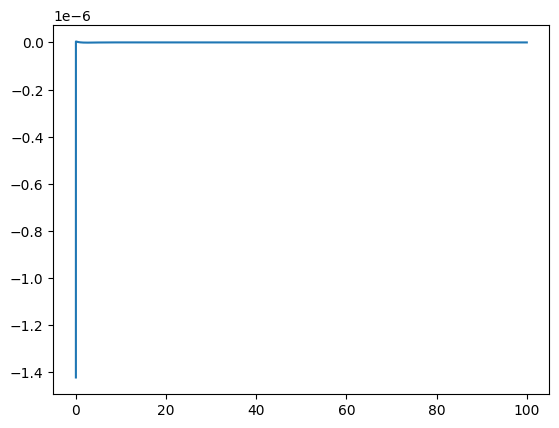

In [122]:
plt.plot(r,f)
f[0:50]